# Demo the DFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## DFT and its inverse

In [2]:
def DFT(x):
    '''
    DFT    Compute the Discrete Fourier Transform
        Input:
          x  : discrete-time signal in an array
        Output:
          X  : DFT of the input signal x
    '''
    N = len(x)
    W_N = np.exp(-1j * 2 * np.pi / N)
    
    X = np.zeros_like(x, dtype=complex) # data types: important in Python!!

    for k in range(len(X)):
        # Compute the DFT sum over signal samples in x
        for n in range(len(x)):
            X[k] = X[k] + x[n] * W_N**(k * n)  
            
    return X


def IDFT(X):
    '''
    IDFT    Compute the Inverse Discrete Fourier Transform
        Input:
          X  : DFT coefficients of a signal
        Output:
          x  : the inverse DFT of the input X
    '''
    N = len(X)
    W_N = np.exp(-1j * 2 * np.pi / N)
    
    x = np.zeros_like(X, dtype=complex) # data types: important in Python!!

    for n in range(len(x)):
        # Compute the IDFT sum over DFT coefficients in X
        for k in range(len(X)):
            x[n] = x[n] + X[k] * W_N**(- k * n)  
            
        x[n] = x[n] / N
        
    return x

## First example signal

X =  [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


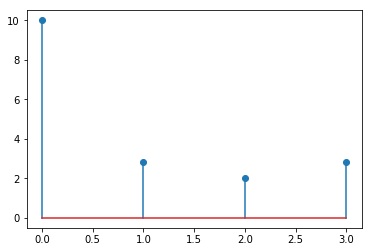

In [3]:
x = np.array([1, 2, 3, 4])
X = DFT(x) # Compute the DFT of x
print('X = ', X)
plt.stem(np.abs(X));

In [4]:
# Reconstruct the signal via inverse DFT
xhat = IDFT(X)
print('xhat = ', xhat)

xhat =  [1.-5.55111512e-16j 2.-2.77555756e-16j 3.-1.11022302e-16j
 4.+2.77555756e-16j]


## Second signal: circular shift

X =  [10.+0.0000000e+00j -2.-2.0000000e+00j  2.+2.4492936e-16j
 -2.+2.0000000e+00j]


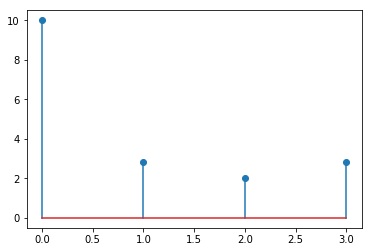

In [5]:
x = np.array([2, 3, 4, 1])
X = DFT(x) # Compute the DFT of x
print('X = ', X)
plt.stem(np.abs(X));

## Third signal: zero padding

Y =  [10.        +0.00000000e+00j -0.41421356-7.24264069e+00j
 -2.        +2.00000000e+00j  2.41421356-1.24264069e+00j
 -2.        -3.55271368e-15j  2.41421356+1.24264069e+00j
 -2.        -2.00000000e+00j -0.41421356+7.24264069e+00j]


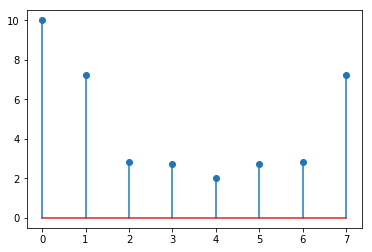

In [6]:
y = np.array([1, 2, 3, 4, 0, 0, 0, 0])
Y = DFT(y) # Compute the DFT of y
print('Y = ', Y)
plt.stem(np.abs(Y), label='Y');

# DFT Application 1: Signal Compression

In [7]:
from scipy import signal
from scipy.io.wavfile import read
from IPython.display import Audio

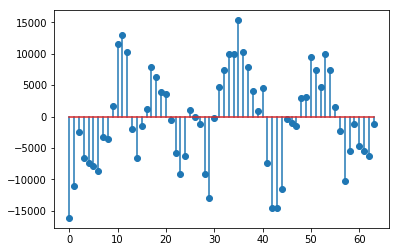

In [8]:
# Load a signal, and extract a window
fs, s = read('handel.wav')
N = 64;
x = s[10000:10000+N]
plt.stem(x);

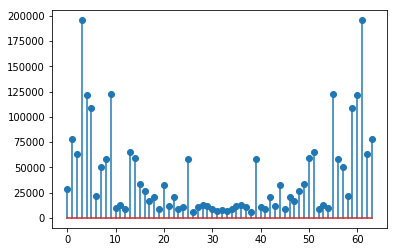

In [9]:
X = DFT(x)
plt.stem(np.abs(X));

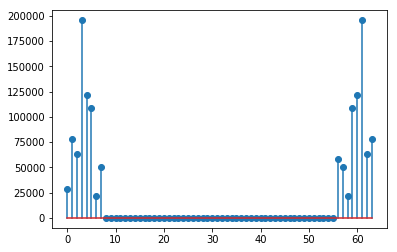

In [10]:
# Only keep 1/8 of low-frequency DFT coefficients; zero out the rest
Y = X
K = int(N/8)
Y[K:N-K] = 0
plt.stem(np.abs(Y));

/Users/minhdo/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


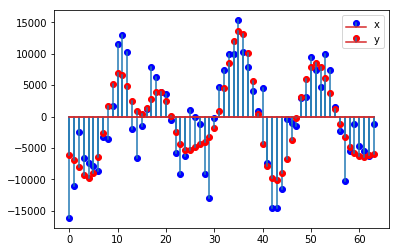

In [11]:
# Reconstruct
y = IDFT(Y)

px = plt.stem(x, markerfmt='bo')
py = plt.stem(y, markerfmt='ro')
plt.legend((px, py), ('x', 'y'));

# DFT Application 2: Spectral Analysis

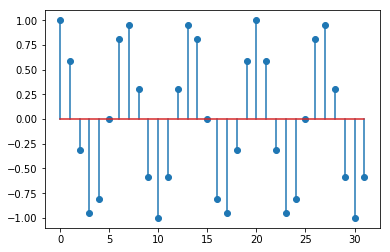

In [12]:
W = 30 * np.pi
T = 1/100
N = 32;
n = np.array(range(N))
x = np.cos(W*T*n)
plt.stem(x);

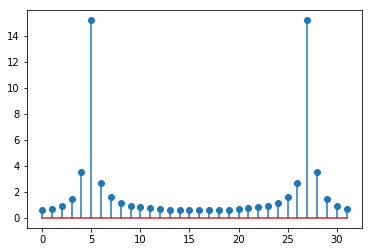

In [13]:
X = DFT(x)
plt.stem(np.abs(X));

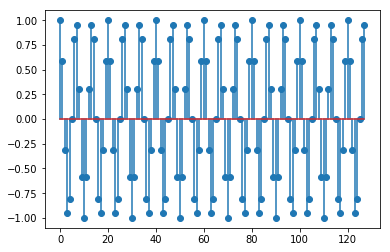

In [14]:
N = 128;
n = np.array(range(N))
x = np.cos(W*T*n)
plt.stem(x);

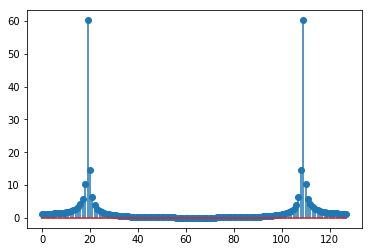

In [15]:
X = DFT(x)
plt.stem(np.abs(X));

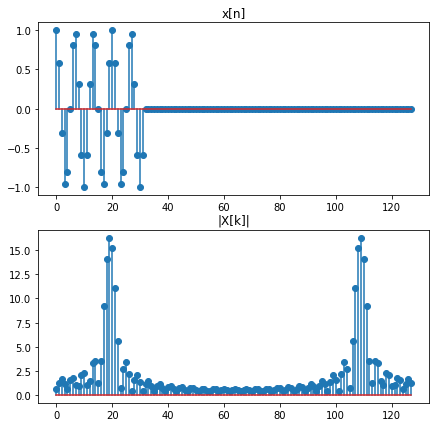

In [16]:
W = 30 * np.pi
T = 1/100
N = 32;
n = np.array(range(N))
x = np.cos(W*T*n)

xz = np.pad(x, (0, 96), 'constant', constant_values=(0,0))

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(xz); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(xz))); plt.title('|X[k]|');

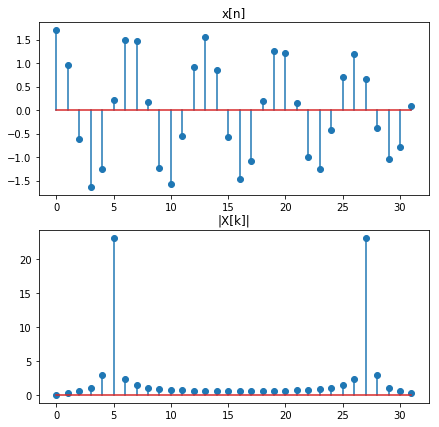

In [17]:
# Signal with 2 frequencies
W1 = 30 * np.pi
W2 = 32 * np.pi
T = 1/100
N = 32;
n = np.array(range(N))
x = np.cos(W1*T*n) + 0.7*np.cos(W2*T*n)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(x); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(x))); plt.title('|X[k]|');

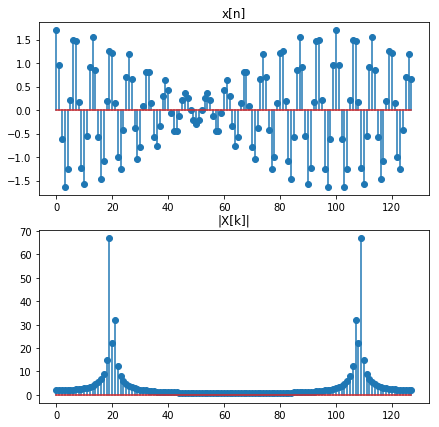

In [18]:
# Longer window of samples
W1 = 30 * np.pi
W2 = 32 * np.pi
T = 1/100
N = 128;
n = np.array(range(N))
x = np.cos(W1*T*n) + 0.7*np.cos(W2*T*n)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(x); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(x))); plt.title('|X[k]|');

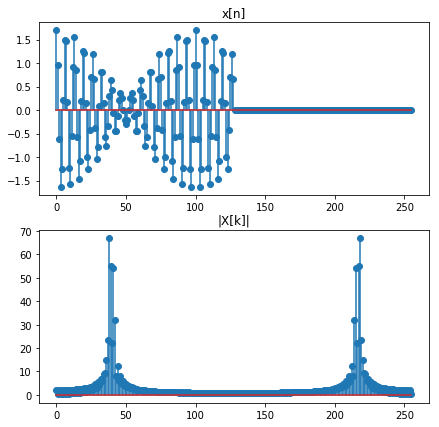

In [19]:
# Zero padding
xz = np.pad(x, (0, 128), 'constant', constant_values=(0,0))

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(xz); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(xz))); plt.title('|X[k]|');

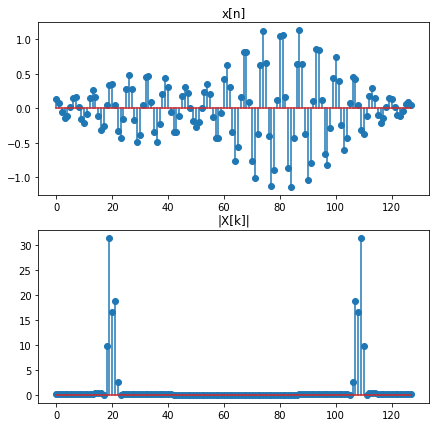

In [20]:
# Windowing
w = np.hamming(N)
xw = np.multiply(x, w)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(xw); plt.title('x[n]')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(xw))); plt.title('|X[k]|');

# DTFT, DFT, and Windowing Effects

In [21]:
def DTFT(x, n0, w):
    '''
    DTFT    Compute the Discrete-Time Fourier Transform of a signal
        Input:
          x  : discrete-time signal in an array
          n0 : index of the signal corresponding to the sample x[0]
          w  : array of frequencies that we want to compute DTFT
               for example: w = np.linspace(-pi,pi,100)
        Output:
          X  : DTFT coefficients at the specified frequencies w
    '''
    X = np.zeros_like(w,dtype=complex) # data types: important in Python!!
    # For each frequency in w
    for k in range(len(w)):
        # Compute the DTFT sum over signal samples
        X[k] = 0
        for n in range(len(x)):
            X[k] = X[k] + x[n] * np.exp(-1j * w[k] * (n + n0))
            
    return X

In [22]:
N = 16
n = np.array(range(N))
win_rect = np.ones(N)
win_hamm = np.hamming(N)

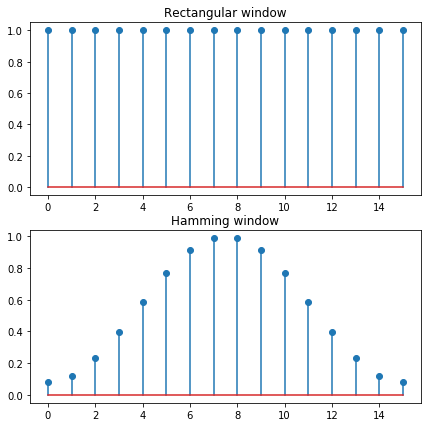

In [23]:
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(win_rect); plt.title('Rectangular window')
plt.subplot(2,1,2)
plt.stem(win_hamm); plt.title('Hamming window');

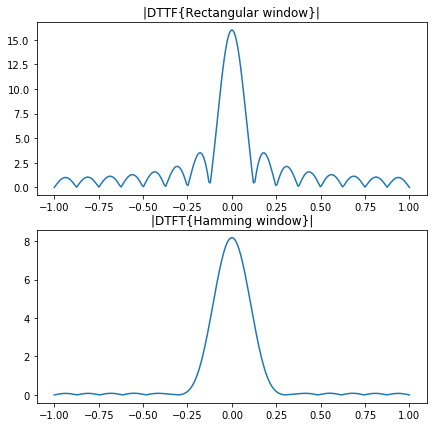

In [24]:
w = np.linspace(-np.pi, np.pi, 256)
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.plot(w / np.pi, np.abs(DTFT(win_rect, 0, w))); plt.title('|DTTF{Rectangular window}|')
plt.subplot(2,1,2)
plt.plot(w / np.pi, np.abs(DTFT(win_hamm, 0, w))); plt.title('|DTFT{Hamming window}|');

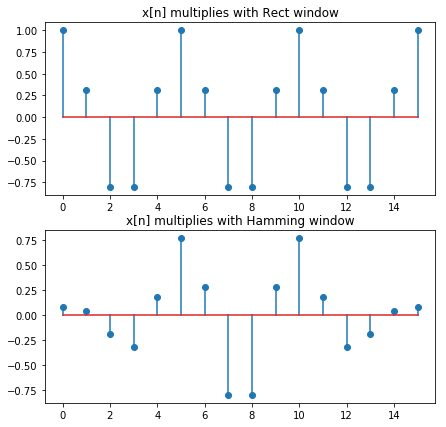

In [25]:
w0 = 0.4 * np.pi
x = np.cos(w0 * n)
x_rect = np.multiply(x, win_rect)
x_hamm = np.multiply(x, win_hamm)

plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(x_rect); plt.title('x[n] multiplies with Rect window')
plt.subplot(2,1,2)
plt.stem(x_hamm); plt.title('x[n] multiplies with Hamming window');

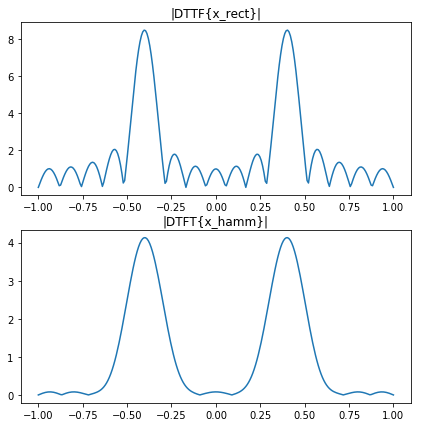

In [26]:
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.plot(w / np.pi, np.abs(DTFT(x_rect, 0, w))); plt.title('|DTTF{x_rect}|')
plt.subplot(2,1,2)
plt.plot(w / np.pi, np.abs(DTFT(x_hamm, 0, w))); plt.title('|DTFT{x_hamm}|');

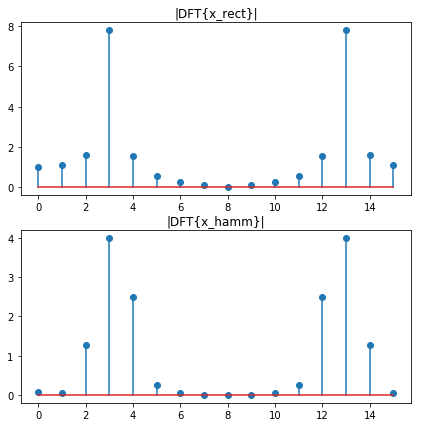

In [27]:
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.stem(np.abs(DFT(x_rect))), plt.title('|DFT{x_rect}|')
plt.subplot(2,1,2)
plt.stem(np.abs(DFT(x_hamm))), plt.title('|DFT{x_hamm}|');

# Spectral Analysis: Revisit

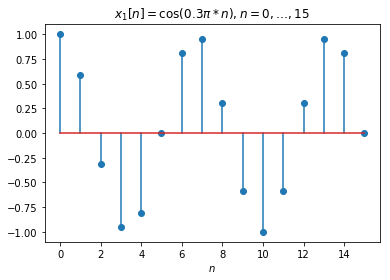

In [28]:
N = 16;
w0 = 0.3*np.pi
n = np.array(range(N))
x1 = np.cos(w0*n)
plt.stem(x1)
plt.xlabel('$n$')
plt.title('$x_1[n] = \cos(0.3 \pi  * n), n = 0,\ldots,15$');

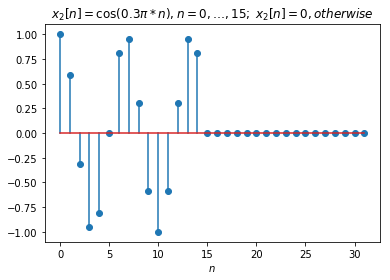

In [29]:
x2 = np.pad(x1, (0, N), 'constant', constant_values=(0,0))
plt.stem(x2)
plt.xlabel('$n$')
plt.title('$x_2[n] = \cos(0.3 \pi * n), n = 0,\ldots,15; \; x_2[n] = 0, otherwise$');

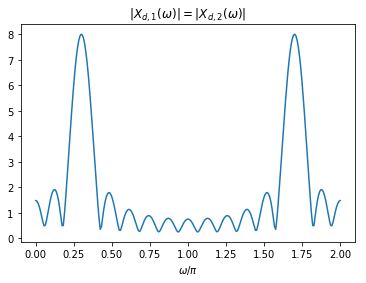

In [30]:
w = np.linspace(0, 2*np.pi, 256)
plt.plot(w / np.pi, np.abs(DTFT(x1, 0, w)))
plt.title('$|X_{d,1}(\omega)| = |X_{d,2}(\omega)|$')
plt.xlabel('$\omega / \pi$');

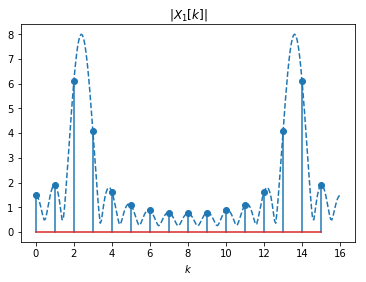

In [31]:
plt.stem(np.abs(DFT(x1)))
plt.title('$|X_1[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2*np.pi) * N, np.abs(DTFT(x1, 0, w)), '--')
plt.show;

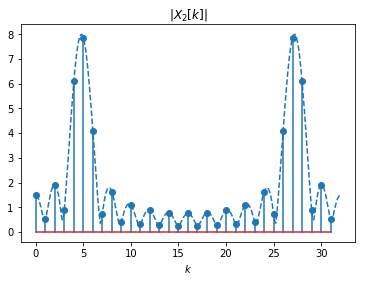

In [32]:
plt.stem(np.abs(DFT(x2)))
plt.title('$|X_2[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2*np.pi) * (2 * N), np.abs(DTFT(x2, 0, w)), '--')
plt.show;

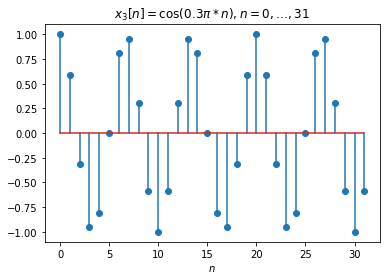

In [33]:
n = np.array(range(2*N))
x3 = np.cos(w0*n)
plt.stem(x3)
plt.xlabel('$n$')
plt.title('$x_3[n] = \cos(0.3 \pi  * n), n = 0,\ldots,31$');

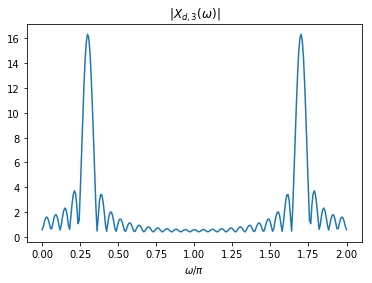

In [34]:
Xd3 = DTFT(x3, 0, w)
plt.plot(w / np.pi, np.abs(Xd3))
plt.title('$|X_{d,3}(\omega)|$')
plt.xlabel('$\omega / \pi$');

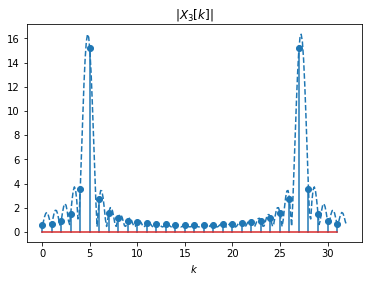

In [35]:
plt.stem(np.abs(DFT(x3)))
plt.title('$|X_3[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2 *np.pi) * (2 * N), np.abs(DTFT(x3, 0, w)), '--')
plt.show;

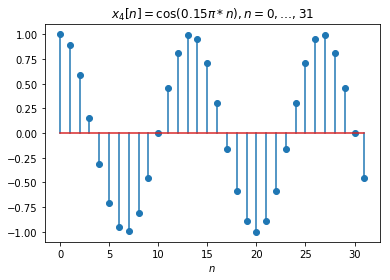

In [36]:
# Effect of changing the sampling period T -> T/2
w0 = w0 / 2.0
n = np.array(range(2*N))
x4 = np.cos(w0*n)
plt.stem(x4)
plt.xlabel('$n$')
plt.title('$x_4[n] = \cos(0.15 \pi  * n), n = 0,\ldots,31$');

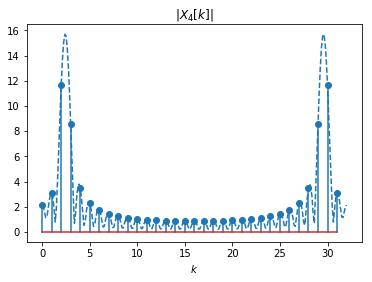

In [37]:
plt.stem(np.abs(DFT(x4)))
plt.title('$|X_4[k]|$')
plt.xlabel('$k$')
plt.plot(w / (2 *np.pi) * (2 * N), np.abs(DTFT(x4, 0, w)), '--')
plt.show;